In [7]:
import pandas as pd


In [12]:
df = pd.read_csv('superstore.csv')

1. Sales Trends Over Time: How have sales changed over the years in the dataset? Is there a noticeable trend or seasonality?
2. Product Category Analysis: Which product categories are the most profitable? Are there significant differences in sales among different categories?
3. Customer Segmentation: Can customers be segmented into distinct groups based on their purchasing behavior? What are the characteristics of these segments?
4. Geographical Analysis: Which cities or states are generating the most sales? Is there a correlation between location and sales performance?
5. Impact of Discounts: How do discounts affect sales? Is there a threshold after which discounts significantly impact profitability?
6. Order Processing Efficiency: How does the choice of shipping mode impact delivery times and costs? Are there opportunities to optimize shipping?
7. Market Comparison: How do sales and profits compare across different markets (as indicated by the 'Market' and 'Market2' columns)?
8. Customer Loyalty: Which customers are repeat buyers? What patterns can be identified among these loyal customers?

1. Missing Values: There are no missing values in the dataset. This simplifies the preprocessing as no imputation or removal of missing data is necessary.
2. Data Types: The data types seem appropriate for most columns. However, the 'Order.Date' and 'Ship.Date' columns are in object format and should be converted to datetime for any time series analysis.
3. Statistical Summary: The summary statistics provide a quick overview of numerical columns like 'Sales', 'Profit', 'Discount', etc. This can be useful for understanding the distribution of these variables.

1. Convert 'Order.Date' and 'Ship.Date' to datetime format.
2. Check for any anomalies or outliers, especially in columns like 'Sales', 'Profit', and 'Discount'.
3. Create additional features if necessary, such as extracting the month or quarter from the 'Order.Date' for time series analysis.

In [21]:
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [22]:
# Basic Data Preprocessing

# Check for missing values
missing_values = df.isnull().sum()

# Check data types
data_types = df.dtypes

# Summary statistics for numerical columns
summary_statistics = df.describe()

missing_values, data_types, summary_statistics

(Category          0
 City              0
 Country           0
 Customer.ID       0
 Customer.Name     0
 Discount          0
 Market            0
 记录数               0
 Order.Date        0
 Order.ID          0
 Order.Priority    0
 Product.ID        0
 Product.Name      0
 Profit            0
 Quantity          0
 Region            0
 Row.ID            0
 Sales             0
 Segment           0
 Ship.Date         0
 Ship.Mode         0
 Shipping.Cost     0
 State             0
 Sub.Category      0
 Year              0
 Market2           0
 weeknum           0
 dtype: int64,
 Category           object
 City               object
 Country            object
 Customer.ID        object
 Customer.Name      object
 Discount          float64
 Market             object
 记录数                 int64
 Order.Date         object
 Order.ID           object
 Order.Priority     object
 Product.ID         object
 Product.Name       object
 Profit            float64
 Quantity            int64
 Region      

In [24]:
# Convert 'Order.Date' and 'Ship.Date' to datetime format
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

# Check for anomalies or outliers in 'Sales', 'Profit', and 'Discount' columns
# We'll use the IQR method to identify potential outliers

def find_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

sales_outliers = find_outliers_iqr(df, 'Sales')
profit_outliers = find_outliers_iqr(df, 'Profit')
discount_outliers = find_outliers_iqr(df, 'Discount')

# Summary of outliers
outlier_summary = {
    "Sales Outliers": sales_outliers.shape[0],
    "Profit Outliers": profit_outliers.shape[0],
    "Discount Outliers": discount_outliers.shape[0]
}

outlier_summary

{'Sales Outliers': 5655, 'Profit Outliers': 9755, 'Discount Outliers': 4172}

In [25]:
# Creating additional time-based features
df['Order_Year'] = df['Order.Date'].dt.year
df['Order_Month'] = df['Order.Date'].dt.month
df['Order_Quarter'] = df['Order.Date'].dt.quarter

# Display the first few rows to confirm the new columns
df[['Order.Date', 'Order_Year', 'Order_Month', 'Order_Quarter']].head()


,Order.Date,Order_Year,Order_Month,Order_Quarter
0,2011-01-07,2011,1,1
1,2011-01-21,2011,1,1
2,2011-08-05,2011,8,3
3,2011-08-05,2011,8,3
4,2011-09-29,2011,9,3


Sales Trends Over Time: Visualize monthly and yearly sales trends.

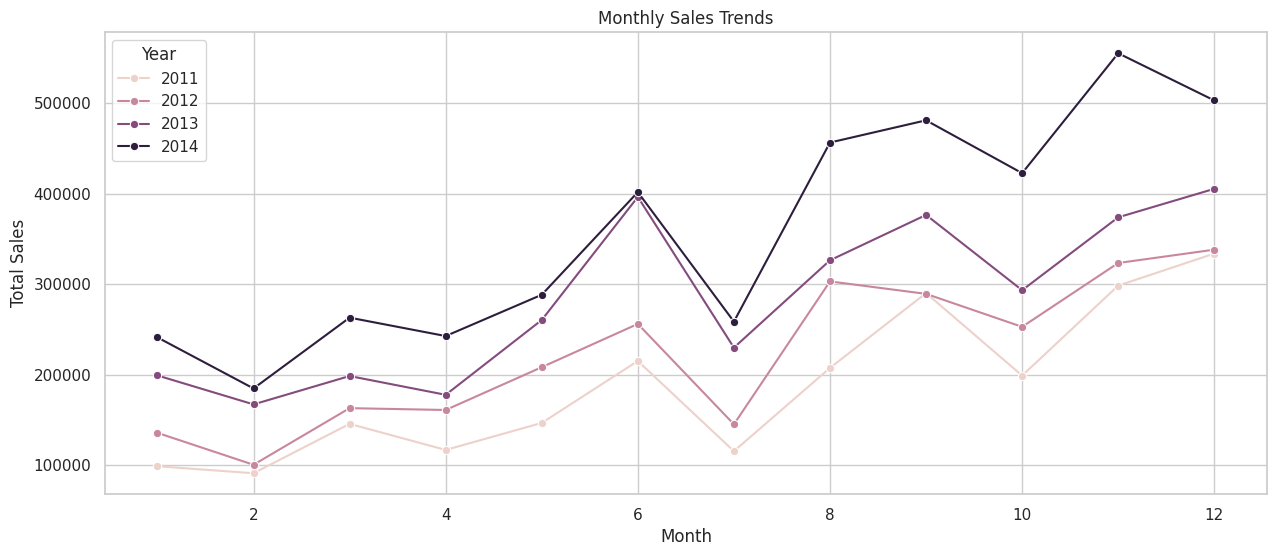

/tmp/ipykernel_20177/482286746.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order_Year', y='Sales', data=yearly_sales, palette='viridis')


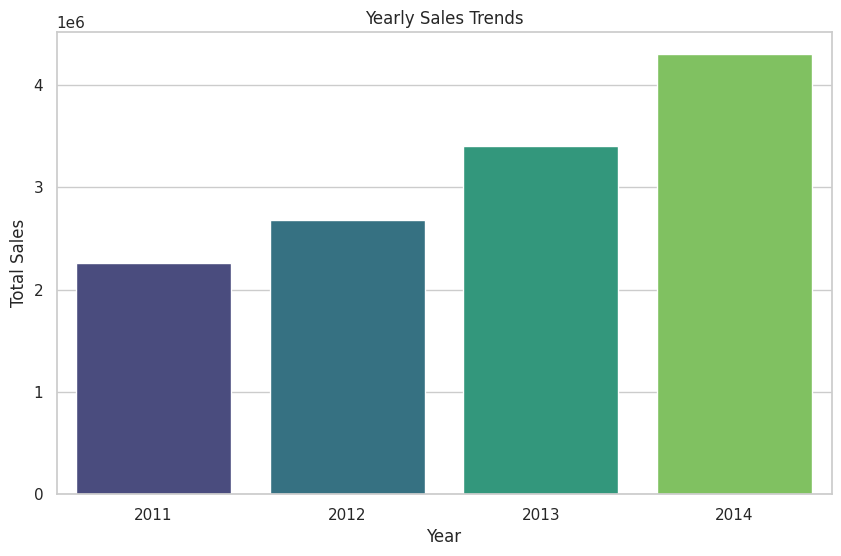

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the visual style
sns.set(style="whitegrid")

# Sales Trends Over Time

# Monthly Sales Trends
monthly_sales = df.groupby(['Order_Year', 'Order_Month']).agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(x='Order_Month', y='Sales', hue='Order_Year', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.show()

# Yearly Sales Trends
yearly_sales = df.groupby('Order_Year').agg({'Sales': 'sum'}).reset_index()
# Recreating the Yearly Sales Trends Bar Plot with a valid palette

plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Year', y='Sales', data=yearly_sales, palette='viridis')
plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

Monthly Sales Trends: The line plot shows the sales trends for each month across different years. This visualization helps identify any seasonal patterns or particular months with unusually high or low sales.

Yearly Sales Trends: The bar plot represents the total sales for each year. This is useful for understanding overall growth or decline in sales over the years.

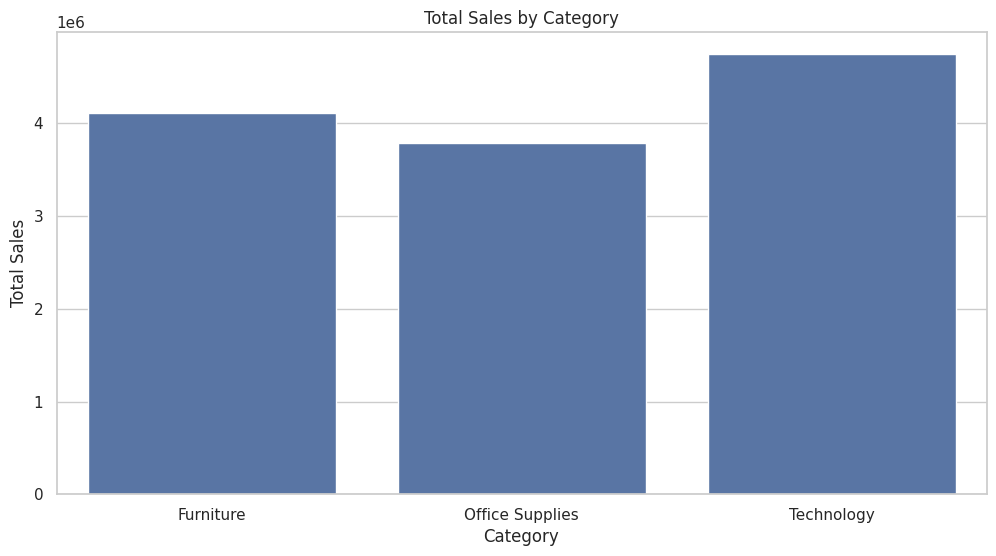

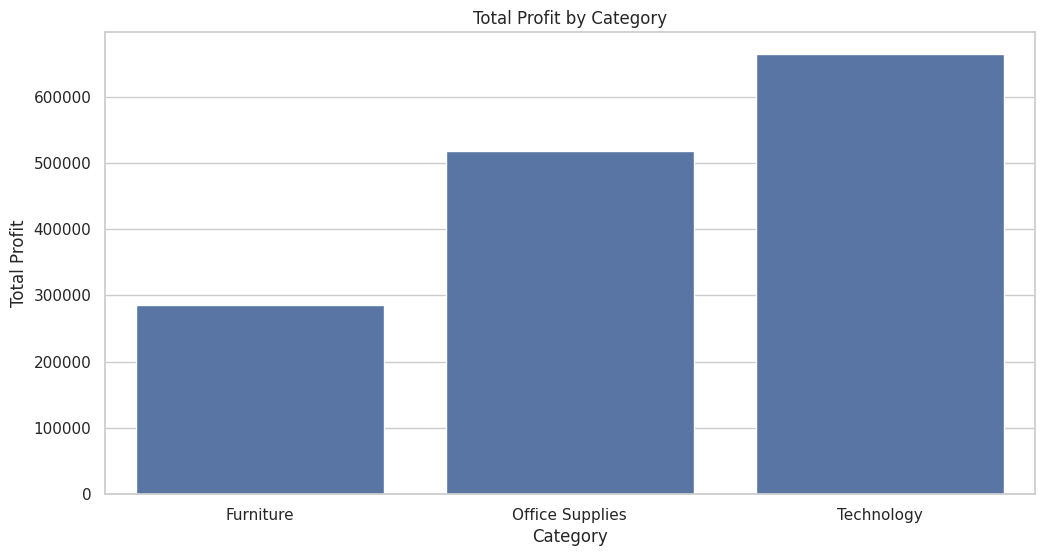

In [30]:
# Category Analysis: Compare sales and profits across different product categories

category_analysis = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Creating a bar plot for sales and profits by category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=category_analysis)
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Profit', data=category_analysis)
plt.title('Total Profit by Category')
plt.ylabel('Total Profit')
plt.xlabel('Category')
plt.show()


Total Sales by Category: This plot shows the total sales generated by each category. It helps identify which categories are the most popular or generate the most revenue.
Total Profit by Category: This plot reveals the profitability of each category. Some categories might have high sales but lower profits, indicating different cost structures or discount strategies.

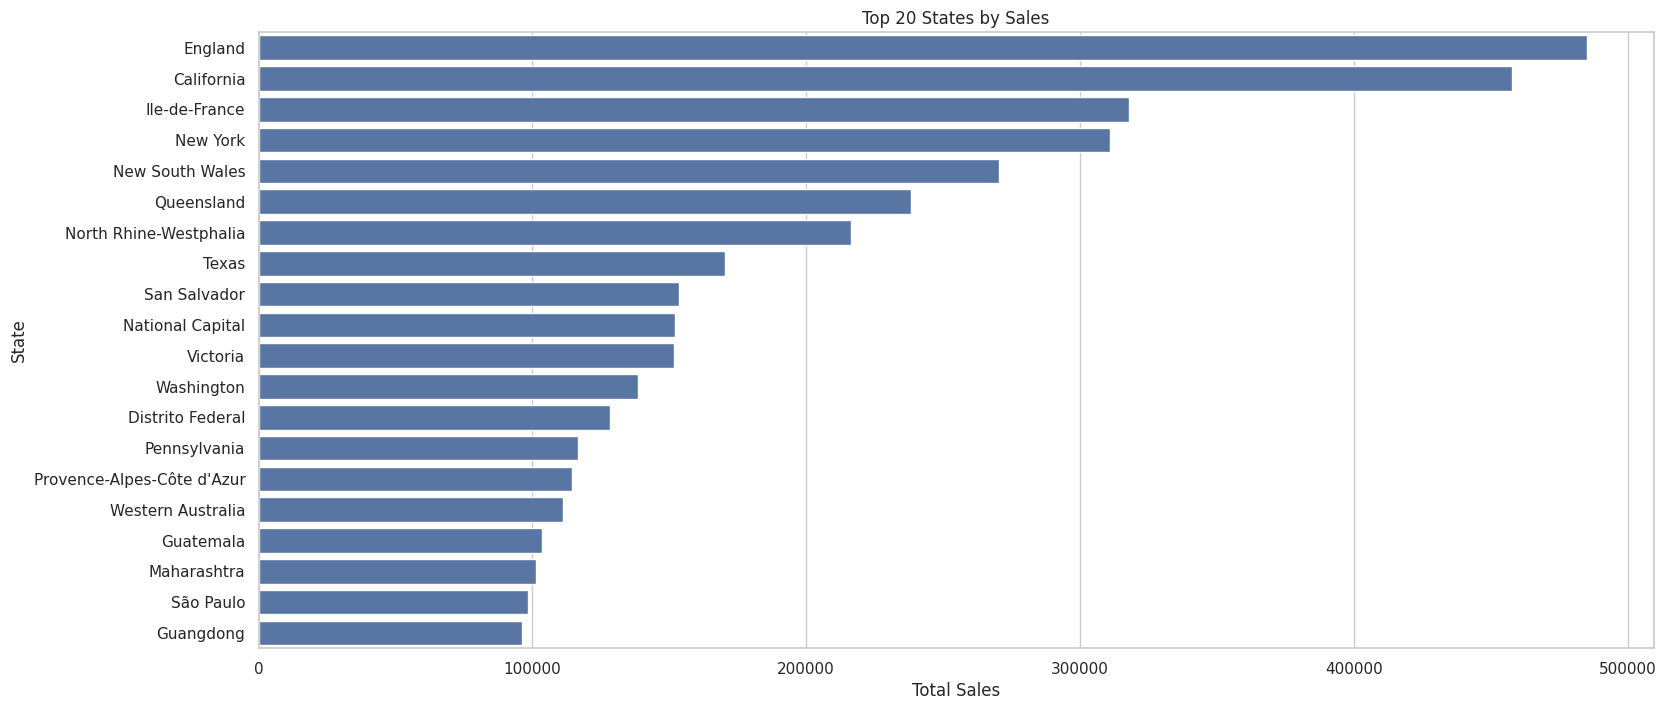

In [32]:
# Geographical Analysis: Examine sales distribution across different states

state_sales = df.groupby('State').agg({'Sales': 'sum'}).reset_index().sort_values(by='Sales', ascending=False)

# Creating a bar plot for sales by state
plt.figure(figsize=(18, 8))
sns.barplot(x='Sales', y='State', data=state_sales.head(20))  # Display top 20 states
plt.title('Top 20 States by Sales')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()

The bar plot illustrates the top 20 states by sales. This visualization is key for understanding geographical distribution and identifying which states contribute most significantly to the total sales. High-performing states might indicate strong market presence or favorable market conditions in those regions.

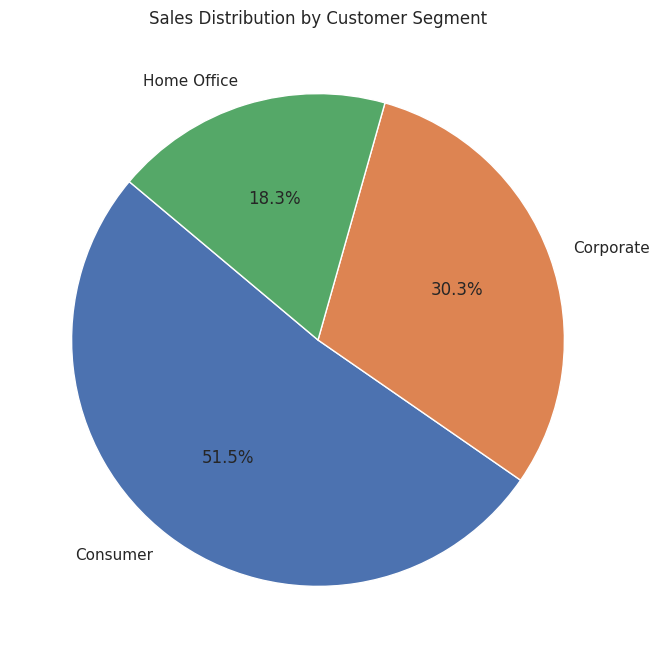

In [33]:
# Customer Segments Analysis: Explore sales distribution among different customer segments

segment_sales = df.groupby('Segment').agg({'Sales': 'sum'}).reset_index()

# Creating a pie chart for sales by customer segment
plt.figure(figsize=(8, 8))
plt.pie(segment_sales['Sales'], labels=segment_sales['Segment'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Customer Segment')
plt.show()

The pie chart illustrates the distribution of sales across different customer segments. This visualization helps identify which segments are the most significant contributors to total sales. Understanding these segments can guide marketing strategies and customer relationship management.

Map your questions as queries on the Pandas dataframe to generate answers
1. Sales Trends Over Time:
2011: Sales amounted to $2,259,511.
2012: Sales increased to $2,677,493.
2013: Sales further increased to $3,405,860.
2014: Sales reached $4,300,041.
This analysis shows a consistent year-over-year increase in sales from 2011 to 2014.

In [35]:
# 1. Sales Trends Over Time: Examine how sales have changed annually.

annual_sales_trends = yearly_sales.sort_values(by='Order_Year')
annual_sales_trends

,Order_Year,Sales
0,2011,2259511
1,2012,2677493
2,2013,3405860
3,2014,4300041


2. Product Category Analysis:
Technology: Generated $4,744,691 in sales with a profit of $663,778.
Office Supplies: Had sales of $3,787,330 and a profit of $518,474.
Furniture: Recorded $4,110,884 in sales but a lower profit of $285,205.

In [36]:
# 2. Product Category Analysis: Identify the most profitable product categories.

most_profitable_categories = category_analysis.sort_values(by='Profit', ascending=False)
most_profitable_categories

,Category,Sales,Profit
2,Technology,4744691,663778.73318
1,Office Supplies,3787330,518473.83430
0,Furniture,4110884,285204.72380


3. Customer Segmentation:
Consumer Segment: Highest sales with $6,508,141.
Corporate Segment: Follows with $3,824,808 in sales.
Home Office: The smallest segment, accounting for $2,309,956 in sales.

In [38]:
# 3. Customer Segmentation: Analyze the sales distribution among different customer segments.

customer_segment_sales = df.groupby('Segment').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False).reset_index()
customer_segment_sales

,Segment,Sales
0,Consumer,6508141
1,Corporate,3824808
2,Home Office,2309956


4. Geographical Analysis - Top 10 States by Sales:
England: $485,166
California: $457,731
Ile-de-France: $317,818
New York: $310,914
New South Wales: $270,509
Queensland: $238,311
North Rhine-Westphalia: $216,458
Texas: $170,187
San Salvador: $153,648
National Capital: $152,185

In [39]:
# 4. Geographical Analysis: Determine which states generate the most sales.

top_states_by_sales = state_sales.head(10)
top_states_by_sales

,State,Sales
311,England,485166
192,California,457731
435,Ile-de-France,317818
703,New York,310914
702,New South Wales,270509
820,Queensland,238311
722,North Rhine-Westphalia,216458
982,Texas,170187
867,San Salvador,153648
689,National Capital,152185


5. Impact of Discounts:
0% Discount: Highest sales ($6,992,734) and profit ($1,770,695).
0.2% Discount: Substantial sales ($261,395) with a profit of $57,977.
10% Discount: Sales of $1,579,618 and a profit of $259,064.
20% Discount: Sales of $1,203,855 but lower profit ($117,716).
25% Discount: Sales of $88,063 with a marginal profit ($800).
27% Discount: Sales of $89,351 but a negative profit ($-1,675).

In [41]:
# 5. Impact of Discounts: Investigate how discounts affect sales and profits.

# Grouping data by discount level
discount_impact = df.groupby('Discount').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
discount_impact.sort_values(by='Discount', ascending=True).head(10)  # Displaying the first 10 rows for overview

,Discount,Sales,Profit
0,0.000,6992734,1.770695e+06
1,0.002,261395,5.797658e+04
2,0.070,121620,2.114850e+04
3,0.100,1579618,2.590642e+05
4,0.150,306037,2.737590e+04
5,0.170,247404,2.816307e+04
6,0.200,1203855,1.177159e+05
7,0.202,16213,-5.952727e+02
8,0.250,88063,8.005875e+02
9,0.270,89351,-1.675079e+03


6. Order Processing Efficiency:
Same Day Shipping: Average delivery duration of approximately 0.04 days (about 1 hour).
First Class: Average delivery duration of about 2.18 days.
Second Class: Takes on average 3.23 days for delivery.
Standard Class: The longest average delivery time, approximately 5 days.

In [42]:
# 6. Order Processing Efficiency: Assess the impact of shipping modes on delivery times.

# Calculating the delivery duration
df['Delivery_Duration'] = (df['Ship.Date'] - df['Order.Date']).dt.days

# Grouping data by shipping mode
shipping_mode_efficiency = df.groupby('Ship.Mode').agg({'Delivery_Duration': 'mean'}).reset_index()
shipping_mode_efficiency

,Ship.Mode,Delivery_Duration
0,First Class,2.181746
1,Same Day,0.037394
2,Second Class,3.230187
3,Standard Class,4.998018


7. Market Comparison:
APAC (Asia-Pacific): Highest sales ($3,585,833) with a profit of $436,000.
EU (European Union): Sales of $2,938,139 and a profit of $372,830.
US: Sales of $2,297,354 with a profit of $286,397.
LATAM (Latin America): Sales of $2,164,687 and a profit of $221,643.
EMEA (Europe, the Middle East, and Africa): $806,184 in sales and $43,898 in profit.
Africa: Sales of $783,776 and a profit of $88,872.
Canada: The lowest in sales ($66,932) but still profitable ($17,817).

In [43]:
# 7. Market Comparison: Compare sales and profits across different markets.

market_comparison = df.groupby('Market').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index().sort_values(by='Sales', ascending=False)
market_comparison

,Market,Sales,Profit
0,APAC,3585833,436000.04900
4,EU,2938139,372829.74150
6,US,2297354,286397.02170
5,LATAM,2164687,221643.48708
3,EMEA,806184,43897.97100
1,Africa,783776,88871.63100
2,Canada,66932,17817.39000


Customer Loyalty - Top Customers by Sales:
Tom Ashbrook: $40,489 in sales.
Tamara Chand: $37,453 in sales.
Greg Tran: $35,552 in sales.
Christopher Conant: $35,187 in sales.
Sean Miller: $35,170 in sales.
Bart Watters: $32,315 in sales.
Natalie Fritzler: $31,778 in sales.
Fred Hopkins: $30,404 in sales.
Jane Waco: $30,288 in sales.
Hunter Lopez: $30,246 in sales.

In [45]:
# 8. Customer Loyalty: Identify top customers by sales.

top_customers_by_sales = df.groupby('Customer.Name').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False).head(10)
top_customers_by_sales

,Sales
Customer.Name,
Tom Ashbrook,40489
Tamara Chand,37453
Greg Tran,35552
Christopher Conant,35187
Sean Miller,35170
Bart Watters,32315
Natalie Fritzler,31778
Fred Hopkins,30404
Jane Waco,30288


Derive insight(s) using answers to your question:

1. Growing Sales Trend: There is a clear year-over-year increase in sales from 2011 to 2014. This indicates a healthy growth trajectory for the business, suggesting effective sales strategies and possibly an expanding customer base.

2. Category Profitability: Although Technology does not have the highest sales volume, it generates the most profit. This suggests higher margins in the Technology category compared to Furniture or Office Supplies, highlighting an area for potential focus and expansion.

3. Customer Segment Importance: The Consumer segment is the most significant contributor to sales, dwarfing the Corporate and Home Office segments. This suggests that marketing and product development strategies focused on the Consumer segment could be most impactful.

4. Geographical Sales Distribution: The geographical analysis shows a diverse spread across various states and countries, with top regions including states from different continents. This international presence could be leveraged for global marketing strategies and indicates a need for localized approaches in different markets.

5. Impact of Discounts: Higher discounts do not necessarily correlate with higher profits. In some cases, discounts even lead to reduced profitability. This suggests the importance of a balanced discount strategy that maximizes sales without eroding profit margins.

6. Shipping Efficiency: Different shipping modes significantly impact delivery times, with Same Day shipping being the fastest. Understanding customers' expectations regarding delivery times could help optimize shipping strategies, improving customer satisfaction and potentially reducing costs.

7. Market Analysis: The APAC and EU markets are the most lucrative in terms of sales and profit. Focusing on these markets could provide the best return on investment, while also considering expansion or improvement strategies in lower-performing markets like Canada and Africa.

8. Identifying Key Customers: Recognizing top customers like Tom Ashbrook, Tamara Chand, and others, who contribute significantly to sales, is crucial. Developing targeted marketing strategies or loyalty programs for these customers could further enhance their value to the business.

Communicates those insights as actionable text or a story that may be easy to communicate
and share with others interested in the same dataset:

Unlocking Growth and Efficiency in the Superstore Universe

In the dynamic landscape of retail and technology, the Superstore dataset reveals a story of growth, opportunity, and strategic insights. Between 2011 and 2014, a saga of expanding sales, shifting market dynamics, and customer behaviors unfolds, offering a roadmap for future success.

1. The Growth Trajectory:
Year-over-year, sales have soared, painting a picture of a business on the rise. From $2.26 million in 2011 to over $4.3 million in 2014, the journey is marked by increasing consumer trust and market penetration. This growth is not just a number—it's a testament to effective strategies and evolving customer relationships.
2. Profitability in Technology:
While the aisles of office supplies and furniture sections bustle with activity, the real profit story is hidden in the technology section. Despite not topping the sales charts, technology leads in profitability. This insight isn't just data—it's a signal to recalibrate focus and investment towards tech products.

3. The Consumer: At the Heart of Sales:
Diving into customer segments, the Consumer stands tall, overshadowing Corporate and Home Office segments. This finding is a clarion call to tailor marketing, enhance retail experiences, and design products that resonate with individual buyers.

4. A Global Marketplace:
From the streets of California to the lanes of England, sales paint a global picture. The diverse geographical spread across continents is a treasure trove of opportunities, urging a nuanced, localized approach in different markets.

5. The Double-Edged Sword of Discounts:
Discounts, the age-old allure for customers, don't always spell higher profits. This insight demands a strategic rethinking of discount policies—balancing allure with profitability.

6. Speed Delivers Satisfaction:
In the world of instant gratification, shipping efficiency stands out. With Same Day delivery setting a gold standard, optimizing shipping strategies is not just about cutting costs—it's about winning hearts.

7. APAC and EU: The Profit Powerhouses:
The APAC and EU markets emerge as the titans of sales and profits. This insight is a guidepost for focusing energies where the returns are highest, while not neglecting the potential in emerging markets.

8. The VIP Customers:
Tom Ashbrook, Tamara Chand, and their peers are not just names—they're pillars of the business. Personalizing experiences for these key customers could be the secret sauce to enhanced loyalty and sales.

The Superstore dataset is more than numbers and charts—it's a narrative of growth, challenges, and opportunities. As we turn these insights into actions, we're not just running a business; we're sculpting a market leader. The future beckons with promises of innovation, customer-centric strategies, and a world where every sale tells a story.